<a href="https://colab.research.google.com/github/Jruz9/Week_2_machine_learning/blob/master/Stock_Predictor_using_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
from sklearn.linear_model import LinearRegression
import math


start = datetime.datetime(2014, 1, 1) #our starting date for our database
end = datetime.datetime(2019, 9, 9) #our end date for our database

df = web.DataReader("MSFT", 'yahoo', start, end)    #Data about microsoft's stock performance from yahoo
df.tail() #reads the bottom values of the database



,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-03,137.199997,135.699997,136.610001,136.039993,18869300.0,136.039993
2019-09-04,137.690002,136.479996,137.300003,137.630005,17995900.0,137.630005
2019-09-05,140.380005,138.759995,139.110001,140.050003,26101800.0,140.050003
2019-09-06,140.179993,138.199997,140.029999,139.100006,20824500.0,139.100006
2019-09-09,139.750000,136.460007,139.589996,137.520004,25773900.0,137.520004


In [0]:
df['HighLow_PCT']= (df['High'] - df['Low']) / df['Close'] * 100   #A alogirthm  for high-low percent change
df['PCT_CHANGE'] = (df['Close'] - df['Open']) / df['Open'] * 100  # a percent change alogithm
df.head()

,High,Low,Open,Close,Volume,Adj Close,HighLow_PCT,PCT_CHANGE
Date,,,,,,,,
2014-01-02,37.400002,37.099998,37.349998,37.160000,30632200.0,32.582050,0.807328,-0.508698
2014-01-03,37.220001,36.599998,37.200001,36.910000,31134800.0,32.362835,1.679769,-0.779572
2014-01-06,36.889999,36.110001,36.849998,36.130001,43603700.0,31.678938,2.158867,-1.953860
2014-01-07,36.490002,36.209999,36.330002,36.410000,35802800.0,31.924446,0.769027,0.220198
2014-01-08,36.139999,35.580002,36.000000,35.759998,59971700.0,31.354523,1.565989,-0.666671


In [0]:
forecast_col = 'Adj Close'
df.fillna(method='ffill', inplace=True)
forecast_out = 30
df['label'] = df[forecast_col].shift(-forecast_out) #

In [0]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,HighLow_PCT,PCT_CHANGE,label
Date,,,,,,,,,
2019-09-03,137.199997,135.699997,136.610001,136.039993,18869300.0,136.039993,1.102617,-0.417252,NaN
2019-09-04,137.690002,136.479996,137.300003,137.630005,17995900.0,137.630005,0.879174,0.240351,NaN
2019-09-05,140.380005,138.759995,139.110001,140.050003,26101800.0,140.050003,1.156737,0.675726,NaN
2019-09-06,140.179993,138.199997,140.029999,139.100006,20824500.0,139.100006,1.423433,-0.664138,NaN
2019-09-09,139.750000,136.460007,139.589996,137.520004,25773900.0,137.520004,2.392374,-1.482909,NaN


In [0]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,HighLow_PCT,PCT_CHANGE,label
Date,,,,,,,,,
2014-01-02,37.400002,37.099998,37.349998,37.160000,30632200.0,32.582050,0.807328,-0.508698,32.985371
2014-01-03,37.220001,36.599998,37.200001,36.910000,31134800.0,32.362835,1.679769,-0.779572,33.056034
2014-01-06,36.889999,36.110001,36.849998,36.130001,43603700.0,31.678938,2.158867,-1.953860,33.135548
2014-01-07,36.490002,36.209999,36.330002,36.410000,35802800.0,31.924446,0.769027,0.220198,33.347565
2014-01-08,36.139999,35.580002,36.000000,35.759998,59971700.0,31.354523,1.565989,-0.666671,33.550739


In [0]:
df = df.drop(labels='Adj Close', axis=1)
import numpy as np

X = np.array(df.drop(['label'], 1))

In [0]:
X

array([[ 3.74000015e+01,  3.70999985e+01,  3.73499985e+01, ...,
         3.06322000e+07,  8.07327914e-01, -5.08697817e-01],
       [ 3.72200012e+01,  3.65999985e+01,  3.72000008e+01, ...,
         3.11348000e+07,  1.67976903e+00, -7.79572338e-01],
       [ 3.68899994e+01,  3.61100006e+01,  3.68499985e+01, ...,
         4.36037000e+07,  2.15886730e+00, -1.95386007e+00],
       ...,
       [ 1.40380005e+02,  1.38759995e+02,  1.39110001e+02, ...,
         2.61018000e+07,  1.15673712e+00,  6.75725999e-01],
       [ 1.40179993e+02,  1.38199997e+02,  1.40029999e+02, ...,
         2.08245000e+07,  1.42343324e+00, -6.64138173e-01],
       [ 1.39750000e+02,  1.36460007e+02,  1.39589996e+02, ...,
         2.57739000e+07,  2.39237433e+00, -1.48290860e+00]])

In [0]:
from sklearn import preprocessing

X = preprocessing.scale(X)
X

array([[-1.16615713, -1.15580932, -1.15669704, ...,  0.02646967,
        -0.95981143, -0.47954558],
       [-1.17235066, -1.1733334 , -1.16189819, ...,  0.06073533,
        -0.02485018, -0.71458087],
       [-1.18370552, -1.19050693, -1.17403447, ...,  0.91082493,
         0.48858082, -1.73349937],
       ...,
       [ 2.37722586,  2.40718742,  2.37181639, ..., -0.28239847,
        -0.58536316,  0.5481679 ],
       [ 2.37034375,  2.38756053,  2.40371719, ..., -0.64218785,
        -0.29955529, -0.61441973],
       [ 2.35554837,  2.32657705,  2.38846017, ..., -0.30475364,
         0.73882124, -1.32485918]])

In [0]:
X_lately = X[-forecast_out:]

In [0]:
X = X[:-forecast_out]

In [0]:
X

array([[-1.16615713, -1.15580932, -1.15669704, ...,  0.02646967,
        -0.95981143, -0.47954558],
       [-1.17235066, -1.1733334 , -1.16189819, ...,  0.06073533,
        -0.02485018, -0.71458087],
       [-1.18370552, -1.19050693, -1.17403447, ...,  0.91082493,
         0.48858082, -1.73349937],
       ...,
       [ 2.38961293,  2.41034216,  2.36453444, ..., -0.64806469,
        -0.38565364,  1.09878227],
       [ 2.38513966,  2.42681484,  2.41758693, ..., -0.81042091,
        -0.83887765, -0.18643872],
       [ 2.42195644,  2.4611619 ,  2.41550652, ..., -0.76401296,
        -0.77866447,  0.56144855]])

In [0]:
df.head()

,High,Low,Open,Close,Volume,HighLow_PCT,PCT_CHANGE,label
Date,,,,,,,,
2014-01-02,37.400002,37.099998,37.349998,37.160000,30632200.0,0.807328,-0.508698,32.985371
2014-01-03,37.220001,36.599998,37.200001,36.910000,31134800.0,1.679769,-0.779572,33.056034
2014-01-06,36.889999,36.110001,36.849998,36.130001,43603700.0,2.158867,-1.953860,33.135548
2014-01-07,36.490002,36.209999,36.330002,36.410000,35802800.0,0.769027,0.220198,33.347565
2014-01-08,36.139999,35.580002,36.000000,35.759998,59971700.0,1.565989,-0.666671,33.550739


In [0]:
df.tail()

,High,Low,Open,Close,Volume,HighLow_PCT,PCT_CHANGE,label
Date,,,,,,,,
2019-09-03,137.199997,135.699997,136.610001,136.039993,18869300.0,1.102617,-0.417252,NaN
2019-09-04,137.690002,136.479996,137.300003,137.630005,17995900.0,0.879174,0.240351,NaN
2019-09-05,140.380005,138.759995,139.110001,140.050003,26101800.0,1.156737,0.675726,NaN
2019-09-06,140.179993,138.199997,140.029999,139.100006,20824500.0,1.423433,-0.664138,NaN
2019-09-09,139.750000,136.460007,139.589996,137.520004,25773900.0,2.392374,-1.482909,NaN


In [0]:
df.dropna(inplace=True)

In [0]:
df.tail()

,High,Low,Open,Close,Volume,HighLow_PCT,PCT_CHANGE,label
Date,,,,,,,,
2019-07-22,139.190002,137.330002,137.410004,138.429993,25074900.0,1.343640,0.742296,136.039993
2019-07-23,139.990005,138.029999,139.759995,139.289993,18034600.0,1.407141,-0.336292,137.630005
2019-07-24,140.740005,138.850006,138.899994,140.720001,20738300.0,1.343092,1.310301,140.050003
2019-07-25,140.610001,139.320007,140.429993,140.190002,18356900.0,0.920175,-0.170897,139.100006
2019-07-26,141.679993,140.300003,140.369995,141.339996,19037600.0,0.976362,0.691032,137.520004


In [0]:
y = np.array(df['label'])

In [0]:
y

array([ 32.98537064,  33.05603409,  33.13554764, ..., 140.05000305,
       139.1000061 , 137.52000427])

In [0]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2) #batchs and randomizes our data for training and predicting

In [0]:
clr = LinearRegression(n_jobs=-1) #linear regression model
clr.fit(X_train, y_train)
Accuracy = clr.score(X_test, y_test)

In [0]:
Accuracy

0.9793226445176556

In [0]:
forecast_set_lr = clr.predict(X_lately) #predicts our values for our x_lately variable
forecast_set_lr

array([146.03316233, 145.86267213, 140.86699067, 142.39824893,
       141.35558048, 136.21552281, 138.8550888 , 138.29509879,
       142.51437229, 142.5022338 , 140.88016366, 141.793025  ,
       138.94735033, 138.02290581, 140.5925232 , 143.10367892,
       142.82675354, 144.05204504, 142.51423997, 138.03175122,
       139.92420604, 140.51907009, 139.76747338, 142.97559232,
       142.53231494, 141.31904071, 142.59230012, 144.94832599,
       144.33325025, 142.44994662])

In [0]:
df['Forecast'] = np.nan #Fills the  Forcast column with NAN values 

In [0]:
df.tail() # Shows the bottom values of the database with our Forecast colum filled with NAN

,High,Low,Open,Close,Volume,HighLow_PCT,PCT_CHANGE,label,Forecast
Date,,,,,,,,,
2019-07-22,139.190002,137.330002,137.410004,138.429993,25074900.0,1.343640,0.742296,136.039993,NaN
2019-07-23,139.990005,138.029999,139.759995,139.289993,18034600.0,1.407141,-0.336292,137.630005,NaN
2019-07-24,140.740005,138.850006,138.899994,140.720001,20738300.0,1.343092,1.310301,140.050003,NaN
2019-07-25,140.610001,139.320007,140.429993,140.190002,18356900.0,0.920175,-0.170897,139.100006,NaN
2019-07-26,141.679993,140.300003,140.369995,141.339996,19037600.0,0.976362,0.691032,137.520004,NaN


In [0]:
df.head() #Shows our top values for our database with the Forecast column filled with NAN

,High,Low,Open,Close,Volume,HighLow_PCT,PCT_CHANGE,label,Forecast
Date,,,,,,,,,
2014-01-02,37.400002,37.099998,37.349998,37.160000,30632200.0,0.807328,-0.508698,32.985371,NaN
2014-01-03,37.220001,36.599998,37.200001,36.910000,31134800.0,1.679769,-0.779572,33.056034,NaN
2014-01-06,36.889999,36.110001,36.849998,36.130001,43603700.0,2.158867,-1.953860,33.135548,NaN
2014-01-07,36.490002,36.209999,36.330002,36.410000,35802800.0,0.769027,0.220198,33.347565,NaN
2014-01-08,36.139999,35.580002,36.000000,35.759998,59971700.0,1.565989,-0.666671,33.550739,NaN


In [0]:
last_date = df.iloc[-1].name  #grabs the last day of the dataset
last_date                     #prints the last day time stamp

Timestamp('2019-07-26 00:00:00')

In [0]:
last_unix = last_date.timestamp()     #grabs the timestamp in days
last_unix #prints the duration of t

1564099200.0

In [0]:
one_day = 86400               #one day has 86400 seconds

In [0]:
next_unix = last_unix + one_day       #adds a day to the last day
next_unix                               # shows the seconds added to the last day seconds

1564185600.0

In [0]:
for i in forecast_set_lr:           #A for loop to add more days and predictions to our Forecast column
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

In [0]:
df.tail(20)

,High,Low,Open,Close,Volume,HighLow_PCT,PCT_CHANGE,label,Forecast
Date,,,,,,,,,
2019-08-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140.880164
2019-08-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141.793025
2019-08-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138.947350
2019-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138.022906
2019-08-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140.592523
2019-08-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143.103679
2019-08-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142.826754
2019-08-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144.052045
2019-08-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142.514240


In [0]:
df.head()

,High,Low,Open,Close,Volume,HighLow_PCT,PCT_CHANGE,label,Forecast
Date,,,,,,,,,
2014-01-02,37.400002,37.099998,37.349998,37.160000,30632200.0,0.807328,-0.508698,32.985371,NaN
2014-01-03,37.220001,36.599998,37.200001,36.910000,31134800.0,1.679769,-0.779572,33.056034,NaN
2014-01-06,36.889999,36.110001,36.849998,36.130001,43603700.0,2.158867,-1.953860,33.135548,NaN
2014-01-07,36.490002,36.209999,36.330002,36.410000,35802800.0,0.769027,0.220198,33.347565,NaN
2014-01-08,36.139999,35.580002,36.000000,35.759998,59971700.0,1.565989,-0.666671,33.550739,NaN


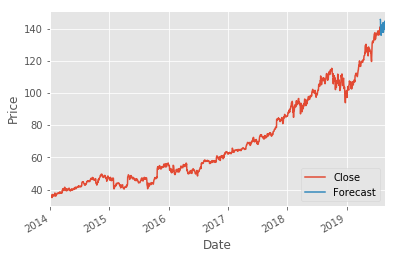

In [0]:
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

df['Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()